In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("forestfires.csv", sep = ",")
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
months, days = [{elem:i for i,elem in enumerate(arr)} for arr in (months,days)]

In [3]:
months, days

({'jan': 0,
  'feb': 1,
  'mar': 2,
  'apr': 3,
  'may': 4,
  'jun': 5,
  'jul': 6,
  'aug': 7,
  'sep': 8,
  'oct': 9,
  'nov': 10,
  'dec': 11},
 {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6})

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
def replace_names_from_dict(data_frame, col_name, dict_name, soft=True):
    if soft:
        return [dict_name.get(elem, elem) for elem in data_frame[col_name]]
    return [dict_name[elem] for elem in data_frame[col_name]]

data['month'] = replace_names_from_dict(data, 'month', months)
data['day'] = replace_names_from_dict(data, 'day', days)

In [6]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
fit_data = data.iloc[:, 0:12]
answers = data.iloc[:,[12]]

,area
3,0.000000
211,3.295837
433,2.793616
258,0.000000
469,4.129229


In [8]:
from sklearn import linear_model

In [9]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(fit_data, answers)
reg.coef_

array([[ 1.96457383,  0.27878714,  2.73554251,  0.75522327, -0.06627348,
         0.09757215, -0.02967479, -0.7294371 ,  0.85598704, -0.21496874,
         1.18440884, -2.9016266 ]])

In [10]:
#Prepare data for cross-val learning
from sklearn.utils import shuffle
from sklearn.cross_validation import cross_val_score
from math import log

data['area'] = [log(x+1) for x in data['area']]
#as most of areas are small or zero, take a logarithm of area
#as was advised in the description of the dataset
data = shuffle(data)
fit_data = data.iloc[:, 0:12]
answers = data.iloc[:,[12]]

/home/cth0/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
fit_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
211,7,4,7,5,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0
433,2,4,7,6,93.6,235.1,723.1,10.1,20.9,66,4.9,0.0
258,3,4,7,5,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0
469,6,3,3,6,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0


In [34]:
from sklearn.cross_validation import cross_val_score as cv_score

regularization_params = [i/10 for i in range(15)]
coeffs= []
for param in regularization_params:
    model = linear_model.Ridge(param)
    model.fit(fit_data, answers)
    coeffs.append(model.coef_)
for i in range(len(coeffs)):
    coeffs[i] = np.reshape(coeffs[i], (12,))

In [35]:
coeffs

[array([ 0.0425947 , -0.00129011,  0.1550639 ,  0.00862479,  0.00502995,
         0.00240059, -0.00119776, -0.02492829,  0.00730238, -0.00418998,
         0.05759247,  0.08504343]),
 array([ 0.04259338, -0.001285  ,  0.15503475,  0.00862141,  0.00503083,
         0.00240036, -0.00119749, -0.02492754,  0.00730302, -0.00418953,
         0.05759481,  0.08484726]),
 array([ 0.04259207, -0.00127989,  0.15500562,  0.00861804,  0.0050317 ,
         0.00240012, -0.00119722, -0.02492678,  0.00730365, -0.00418908,
         0.05759715,  0.084652  ]),
 array([ 0.04259074, -0.00127478,  0.1549765 ,  0.00861468,  0.00503257,
         0.00239988, -0.00119695, -0.02492602,  0.00730427, -0.00418863,
         0.05759946,  0.08445766]),
 array([ 0.04258942, -0.00126967,  0.15494739,  0.00861133,  0.00503343,
         0.00239965, -0.00119668, -0.02492526,  0.00730488, -0.00418819,
         0.05760177,  0.08426421]),
 array([ 0.04258808, -0.00126457,  0.1549183 ,  0.008608  ,  0.0050343 ,
         0.002399

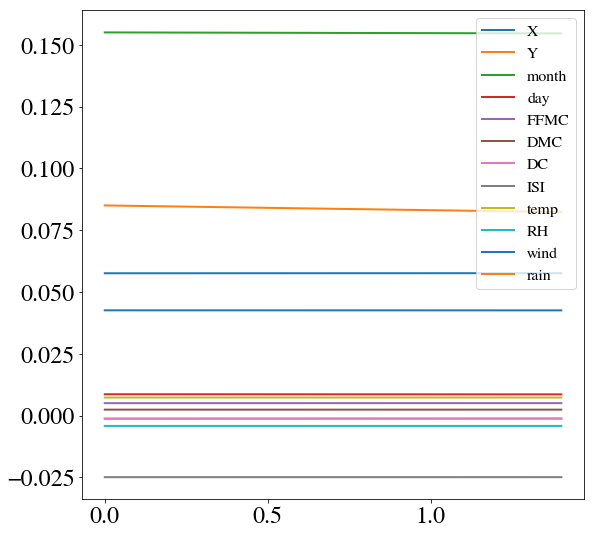

In [39]:
#from recomendations
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

plt.figure(figsize=(9, 9))
plt.plot(regularization_params, coeffs)
plt.legend(data.columns)
plt.show()

In [40]:
main_features_num = []
for i, coeff in enumerate(coeffs[0]):
    if coeff > 0.04:
        main_features_num.append(i)
plot_y = [[coeffs[param_num][main_feature] for main_feature in main_features_num] for param_num in range(len(coeffs))]
labels = [data.columns[main_feature] for main_feature in main_features_num]

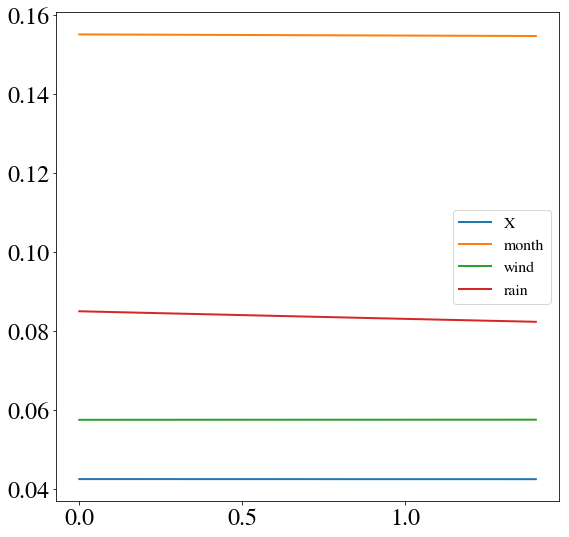

In [41]:
plt.figure(figsize=(9, 9))
plt.plot(regularization_params, plot_y)
plt.legend(labels)
plt.show()

In [55]:
from sklearn.metrics import r2_score, make_scorer

scores = []
for param in regularization_params:
    scores.append(cv_score(linear_model.Ridge(alpha=param), fit_data, answers, scoring = make_scorer(r2_score), cv = 5)) #5 bunches

In [56]:
scores

[array([-0.00580328, -0.40403534,  0.00142337, -0.01776753, -0.03727693]),
 array([-0.00579301, -0.38690548,  0.00144058, -0.01775852, -0.03726942]),
 array([-0.00578276, -0.37093086,  0.00145775, -0.01774956, -0.0372619 ]),
 array([-0.00577254, -0.35600762,  0.00147485, -0.01774065, -0.03725439]),
 array([-0.00576236, -0.34204344,  0.00149191, -0.0177318 , -0.03724688]),
 array([-0.0057522 , -0.32895597,  0.00150892, -0.017723  , -0.03723937]),
 array([-0.00574206, -0.31667163,  0.00152587, -0.01771425, -0.03723185]),
 array([-0.00573196, -0.30512445,  0.00154277, -0.01770556, -0.03722435]),
 array([-0.00572189, -0.29425517,  0.00155962, -0.01769692, -0.03721684]),
 array([-0.00571184, -0.28401044,  0.00157642, -0.01768832, -0.03720933]),
 array([-0.00570182, -0.27434208,  0.00159317, -0.01767978, -0.03720183]),
 array([-0.00569182, -0.26520655,  0.00160987, -0.0176713 , -0.03719432]),
 array([-0.00568186, -0.25656438,  0.00162652, -0.01766286, -0.03718682]),
 array([-0.00567192, -0.2